Segmentation
=======

In [52]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

from skimage import data, segmentation, color
from skimage.future import graph

from mean_shift.mean_shift_utils import *
from mean_shift.mean_shift import *

Original image
----------------

array([[[  9,  28,  60],
        [  8,  27,  57],
        [  7,  26,  56],
        ..., 
        [ 14,  20,  16],
        [ 11,  20,  15],
        [ 11,  20,  15]],

       [[  9,  28,  58],
        [  9,  28,  58],
        [ 10,  27,  55],
        ..., 
        [ 14,  20,  16],
        [ 14,  20,  16],
        [ 12,  21,  16]],

       [[ 10,  27,  55],
        [ 10,  27,  55],
        [  9,  26,  54],
        ..., 
        [ 14,  20,  16],
        [ 14,  20,  16],
        [ 14,  21,  14]],

       ..., 
       [[ 12,  27,  22],
        [ 12,  27,  22],
        [ 11,  28,  22],
        ..., 
        [197, 229, 182],
        [197, 229, 182],
        [197, 229, 182]],

       [[ 12,  27,  24],
        [ 12,  27,  22],
        [ 11,  28,  22],
        ..., 
        [199, 228, 182],
        [200, 229, 183],
        [200, 229, 183]],

       [[ 11,  26,  21],
        [ 10,  27,  21],
        [ 10,  27,  21],
        ..., 
        [201, 230, 184],
        [201, 230, 184],
        [202, 231,

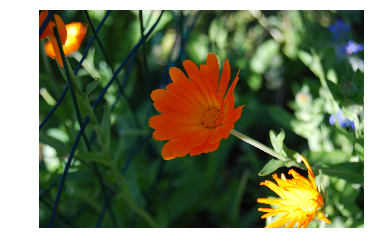

In [53]:
img = plt.imread('data/DSC_0066.JPG')
plt.imshow(img)
plt.axis('off')

img

Segmentation based on Mean shift
-----------------------------------

The kernel for segmentation
$$K_{h_s, h_r}(\mathbf{x}) = \frac{C}{{h^2_s} {h^p_r}}k(\|\frac{\mathbf{x}^s}{h_s}\|^2)k(\|\frac{\mathbf{x}^r}{h_r}\|^2)$$

In [54]:
a = convert_img_vec(img)

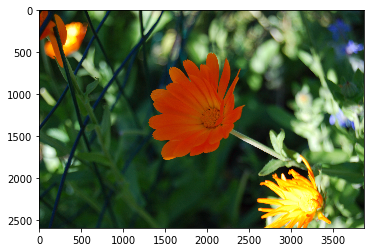

In [56]:
def vec2img(vec, shape):
    l, w = shape
    img_o = np.array(vec)
    img_info = img_o[:, 2:]
    c = img_info.reshape(l, w, 3)
    cc = np.array(c, dtype='uint8')
    im = cv2.cvtColor(cc, cv2.COLOR_Luv2RGB)
    
    return im

## Demo
plt.imshow(vec2img(a, img.shape[:2]))

In [59]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=8)
ms.fit(a)

KeyboardInterrupt: 

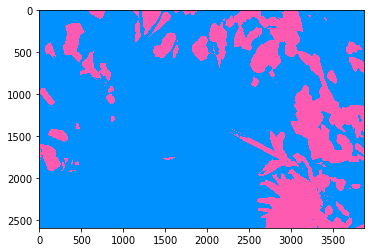

In [51]:
re = vec2img(immm, img.shape[:2])
plt.imshow(re)

In [48]:
immm = []
for i in kmeans.labels_:
    immm.append(kmeans.cluster_centers_[i])

In [43]:
len(immm)f

10036224

Segmentation based on Normalized Cut
----------------------------------------

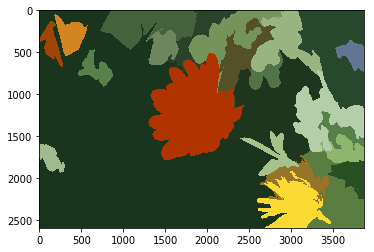

In [28]:
labels1 = segmentation.slic(img, compactness=30, n_segments=100)
g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out = color.label2rgb(labels2, img, kind='avg')
plt.imshow(out)

In [23]:
g.node[0]

{'labels': [0],
 'mean color': array([ 45.49725887,  40.24478899,  26.05699275]),
 'ncut label': 0,
 'pixel count': 70044,
 'total color': array([ 3186810.,  2818906.,  1825136.])}